In [1]:
def split_it(text):
    splt = text.split()
    bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]

    for i in range(len(splt)):
        for b in bad_chars:
            if b in splt[i]:
                splt[i] = splt[i].replace(b, '')
        splt[i]= splt[i].lower()
    
    return splt

In [222]:

from pathlib import Path
from collections import Counter
from nltk.stem import PorterStemmer
import math
from decimal import *
import numpy as np
import pandas as pd
from IPython.display import display




def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier




#CALCULATES THE IG OF EACH WORD
def IG(w, total_pos, total_neg, path_pos, path_neg):
    total_reviews= total_pos + total_neg
    
    
     
    files_positive = Path(path_pos).glob('*.txt')
    files_negative = Path(path_neg).glob('*.txt')
     
    
    
    P1= (total_pos/total_reviews)  #probability of positive reviews
    P0= (total_neg/total_reviews)  #probability of negative reviews
    
    entropy= -P1*math.log2(P1)-P0*math.log2(P0)
    
    
    #Probabilities of C=pos and w=1 & C=neg and w=1
    pos_counter=0
    neg_counter=0 
    total_counter=0
    

    
    for f in files_positive:
        sp= f.read_text().split()
        if w.lower() in [x.lower() for x in sp]:
            pos_counter+=1
            total_counter+=1
      
    for f2 in files_negative:
        sp2= f2.read_text().split()
        if w.lower() in [x.lower() for x in sp2]:
            neg_counter+=1
            total_counter+=1
    
    
    #Probability of w=1 and w=0 
    P_w1 = total_counter/total_reviews
    #print("Probability of ", w, "=1: ", P_w1)
    P_w0 = (total_reviews- total_counter) / total_reviews
    #print("Probability of ", w, "=0: ", P_w0)

        
   
    #Probability of a C=pos and C=neg when w=1
    if P_w1!=0:
        P1_w1= pos_counter/total_counter 
        #print("probability positive reviews with ", w,"=1: ", P1_w1)
        P0_w1= neg_counter/total_counter
        #print("probability negative reviews with ", w,"=1: ", P0_w1)
    else:
        P1_w1=0
        P0_w1=0
    
    
    
    #Probability of a C=pos and C=neg when w=0
    if P_w0!=0:
        P1_w0 = (total_pos-pos_counter)/(total_reviews- total_counter)
        #print("probability positive reviews with ", w,"=0: ", P1_w0)
        P0_w0 = (total_neg-neg_counter)/(total_reviews - total_counter)
        #print("probability negative reviews with ", w,"=0: ", P0_w0)
    else:
        P1_w0 = 0
        P0_w0 = 0
    
    
    entropy_w1= (0 if P1_w1==0 else -P1_w1*math.log2(P1_w1)) - (0 if P0_w1==0 else P0_w1*math.log2(P0_w1))
    #print("Entropy of ", w, "=1: ", entropy_w1)
    entropy_w0= (0 if P1_w0==0 else -P1_w0*math.log2(P1_w0)) - (0 if P0_w0==0 else P0_w0*math.log2(P0_w0))
    #print("Entropy of ", w, "=0: ", entropy_w0)

    
    if entropy!=1.0:
        ig= truncate_float(entropy, 6) - truncate_float((P_w1*entropy_w1 + P_w0*entropy_w0), 6)
    else:
        getcontext().prec = 6
        ig= Decimal(1) - Decimal((P_w1*entropy_w1 + P_w0*entropy_w0))
       
    
    
    #print("IG of ",w , "is: ", ig)
    
    return float(ig)







#FILTERS AN ARRAY OF WORDS BASED ON THEIR IG
def IG_filter(words_filtered, total_pos, total_neg, path_pos, path_neg):
    result=[]
    
    for w in words_filtered:
        ig=IG(w, total_pos, total_neg, path_pos, path_neg)
        if ig >=0.008:
            result.append(w)
    
    return result



In [3]:
import os

class tokenizer():

    #FINDING THE MOST USEFUL ATTRIBUTES (WORDS) IN ALL THE TRAINING DATA
    #CONVERTING THE TRAINING DATA INTO VECTORS OF THE ATTRIBUTES WE CHOSE
    def tokenize(self,path_pos, path_neg):
        
        files_positive = Path(path_pos).glob('*.txt')
        files_negative = Path(path_neg).glob('*.txt')
        
        

        total_pos=0
        total_neg=0

        text= ""
        i=0
        for file in files_positive:
            #print(file.name)
            
            text= text+file.read_text()  # the file is opened and closed
            total_pos += 1
            
            
        for file2 in files_negative:
            #print(file.name)
            
            total_neg+=1
            text= text+file2.read_text()  
            


        total_reviews= total_pos+total_neg  

        print("Total positive reviews: ",  total_pos)
        print("Total negative reviews: ", total_neg)



        #FILTERING THE REVIEWS TO KEEP THE USEFUL WORDS
    


        
        splt= split_it(text)
        Counters_found = Counter(splt)
        most_occur = Counters_found.most_common(700)



        ps = PorterStemmer()
        words=[]
        for i in range(len(most_occur)):
            words.append(most_occur[i][0])
                

        bad_chars = [';', ':'," ", "!", "*", "(", ")", '\"', ".", ",", "/", ">", "<"]
        words_to_exclude = ['-', '--', ';', ':', "!", "*", " ", "(", ")", '\"', ".", 'it\'s', 'br', 'mr', 'there\'s', 'your', 'wasn\'t', 'Ms', 'were', 'how', 'get', 'will', 'also', 'been', 'some', 'into', 'because', 'about', 'out', 'me', 'up', 'down', 'my', 'mine', 'their', 'she', 'he\'s', 'the','you', 'an', 'his', 'him', 'her', 'or', 'was', 'have', 'has', 'had', 'in', 'i', 'he', 'we', 'they', 'their', 'theirs', 'which','what', 'where', 'be', 'they', 'has', 'so',  'by', 'who', 'that','this', 'those', 'your', 'these', 'on', 'there', 'and', 'to', 'a', 'it', 'its', 'for', 'if', 'then', 'is', 'at', 'are', 'of', 'no', 'as', 'but', 'with', 'there']    

        words_filtered=[]
        for i, w in enumerate(words):
            
            
            for b in bad_chars:
                if b in words[i]:
                    words[i]= words[i].replace(b,'')
                    w=words[i]
                

            
            
            if w.lower() in words_to_exclude:
                #print('removing ' +w)
                #words.remove(w)
                continue

            words_filtered.append(words[i])        
                


        words_filtered= words_filtered[:len(words_filtered)-128]
        
        
                
        # c=1
        # for i in  words_filtered:
        #     print(c,'. '+i)
        #     c=c+1
            


        
        self.words_final= IG_filter(words_filtered, total_pos, total_neg, path_pos, path_neg)

            
            
        files_positive2 =Path(path_pos).glob('*.txt')
        files_negative2= Path(path_neg).glob('*.txt')
            
        #TOKENIZES EACH TEXT IN THE MOST USEFUL WORDS WE FOUND
        self.vectors= np.zeros([total_reviews, len(self.words_final)+1], dtype=int)
        i=0
        for file in files_positive2:
            i+=1
            for j,w in enumerate(self.words_final):
                if w.lower() in file.read_text().lower():
                    self.vectors[i][j]=1
            self.vectors[i][len(self.words_final)]=1  # initializing the last cell as 1 (category cell)
    
        i=0
        for file2 in files_negative2:
            i+=1
            for j, w in enumerate(self.words_final):
                if w.lower() in file2.read_text().lower():
                    self.vectors[i][j]=1
            #the last cell in the negative reviews is already 0 
        
        
        vectors_df= pd.DataFrame(self.vectors, columns=self.words_final+ ['Category'])
        display(vectors_df)
        
        return self.vectors
    
    
    
    def get_words_final(self):
        return self.words_final
    
    
    
    
    
    
    def tokenize_new(self, path_pos, path_neg ):
        
        files_positive3 =Path(path_pos).glob('*.txt')
        files_negative3= Path(path_neg).glob('*.txt')
        
        pos_count = len(os.listdir(path_pos))
        neg_count = len(os.listdir(path_neg))
        total_count =pos_count + neg_count
        
        new_vectors= np.zeros([total_count, len(self.words_final)+1], dtype=int)
        
        
        i=0
        for f in files_positive3:
            i+=1
            for j,w in enumerate(self.words_final):
                if w.lower() in f.read_text().lower():
                    new_vectors[i][j]=1
            new_vectors[i][len(self.words_final)]=1  # initializing the last cell as 1 (category cell)
    
        i=0
        for f2 in files_negative3:
            i+=1
            for j, w in enumerate(self.words_final):
                if w.lower() in f2.read_text().lower():
                    new_vectors[i][j]=1
            #the last cell in the negative reviews is already 0 
        
        
        
            
        vectors_df= pd.DataFrame(new_vectors, columns=self.words_final+ ['Category'])
        display(vectors_df)
        
        return new_vectors, vectors_df
            
            

In [50]:

def classification_report(y_real, y_pred, p=1):
    #print(y_pred)
    reports= np.zeros([3,5])
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    support1= 0
    support0= 0
    
    # corr_ident= 0
    # incorr_ident= 0  
    # total_neg= 0
    for i, y in enumerate(y_pred):
        if y== y_real[i] and y==1:
            true_pos+=1
        if y!= y_real[i] and y==1:
            false_pos+=1
        if y!= y_real[i] and y==0:
            false_neg+=1
        if y==y_real[i] and y==0:
            true_neg+=1
        if y_real[i]==1:
            support1+=1
            
    if (true_pos+false_neg) != 0:
        recall= true_pos/(true_pos+false_neg)
    else:
        recall=0
    
    if(true_pos+false_pos) !=0:
        precision = true_pos/ (true_pos +false_pos)
    else:
        precision=0
    
    print("positives that we found: ", true_pos)
    print("positive accuracy: ", true_pos/(true_pos+false_neg))
    

    # print(recall)
    # print(precision)
    if (precision+recall) !=0 :
        f1_score= 2*(precision*recall)/(precision+recall)
    else:
        f1_score=0
        
    accuracy = (true_pos + true_neg) / len(y_real)
    
    reports[1][0]= recall
    reports[1][1]= precision
    reports[1][2]= f1_score
    
    reports[1][4] = support1
    
    if(true_neg+false_pos)!=0:
        #print('Percentage of negatives found correctly: ', true_neg/(true_neg+false_pos) )
        
        reports[0][3]= true_neg/(true_neg+false_pos)
    
    if (true_pos+false_neg) !=0:
        #print('Percentage of positives found correctly: ', true_pos/(true_pos+false_neg))
        reports[1][3]= true_pos/(true_pos+false_neg)
    
    
    
    # reports[2][0] = accuracy 
    # reports[2][1] = accuracy 
    # reports[2][2] = accuracy 
    # reports[2][3] = len(y_real) 
    
    
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i, y in enumerate(y_pred):
        if y== y_real[i] and y==0:
            true_pos+=1
        if y!= y_real[i] and y==0:
            false_pos+=1
        if y!= y_real[i] and y==1:
            false_neg+=1
        if y==y_real[i] and y==1:
            true_neg+=1
        if y_real[i]==0:
            support0+=1
            
            
    print("negatives that we found: ", true_pos)
    print("negative accuracy: ", true_pos/(true_pos+false_neg))
    if (true_pos+false_neg) != 0:
        recall= true_pos/(true_pos+false_neg)
    else:
        recall=0
    
    if(true_pos+false_pos) !=0:
        precision = true_pos/ (true_pos +false_pos)
    else:
        precision=0
    
    # print(recall)
    # print(precision)
    if (precision+recall) !=0 :
        f1_score= 2*(precision*recall)/(precision+recall)
    else:
        f1_score=0
    
    reports[0][0]= recall
    reports[0][1]= precision
    reports[0][2]= f1_score
    
    reports[0][4] = support0
    
    
    reports[2][0] = accuracy
    reports[2][1]= accuracy
    reports[2][2] = accuracy
    reports[2][3] = accuracy
    reports[2][4] = support0 + support1
    
    
    
    
    
    
    
    # support_proportion0= support0/len(y_real)    
    # support_proportion1= support1/len(y_real)
    
    
    # macro_avg_p= (reports[0][1]+reports[1][1])/2
    # macro_avg_r= (reports[0][0] + reports[1][0])/2
    # macro_avg_f1 = (reports[0][2] + reports[1][2])/2
    
    # weighted_avg_r = (reports[0][0]*support_proportion1 + reports[1][0]*support_proportion0)
    # weighted_avg_p= (reports[0][1]*support_proportion1 + reports[1][1]*support_proportion0)
    # weighted_avg_f1= (reports[0][2]*support_proportion1 + reports[1][2]*support_proportion0)
    
    # reports[3][0] = macro_avg_r
    # reports[3][1] = macro_avg_p
    # reports[3][2] = macro_avg_f1
    # reports[3][3] = len(y_real)
    
    # reports[4][0]= weighted_avg_r
    # reports[4][1]= weighted_avg_p
    # reports[4][2] = weighted_avg_f1
    # reports[4][3] =len(y_real)
    
    
    reports_df= pd.DataFrame(reports, columns=['Recall', 'Precision', 'F1-score', 'Accuracy', 'Support'], index=['0','1', 'general accuracy'])
    
    if p==1:
        
        # print('positives that didn\'t find: ', false_neg)
        # print('negatives that didn\'t find: ', false_pos)
        
        display(reports_df)
    
    return reports
    
    

In [160]:
#SPLIT FUNCTION IN ORDER TO SPLIT DATA INTO X AND Y
def split(vectors):
    x = vectors[:,:-1]
    y = vectors[:,-1]
    return x, y

In [161]:
class Node():
    def __init__(self,general_feature_index=None, feature_index = None, left=None, right= None, info_gain= None, value=None):
        
        self.general_feature_index = general_feature_index
        self.feature_index = feature_index
        #self.threshold = threshold
        self.right = right
        self.left = left
        
        #for leaf nodes
        self.value = value

In [223]:
def  split_data( data, feature_index):
    # right_data= []
    # left_data = []
    
    # for i in range(data.shape[0]):
    #     if data[i][feature_index] == 1:
    #         right_data.append(data[i])
    #     else:
    #         left_data.append(data[i])
            
            
            
    right_data= np.array([row for row in data if row[feature_index]==1])
    left_data = np.array([row for row in data if row[feature_index]==0])
    
    #print("number of rows, columns of right data: ", right_data.shape[0], right_data.shape[1])
    #print("number of rows, columns of left data: ", left_data.shape[0], left_data.shape[1])
    #print("right data here: ", right_data)
    #print("left data here: ", left_data)
    
    return left_data, right_data

In [407]:
class decision_tree():
    def __init__(self, max_depth, features=None, min_samples_split=2):
        
        self.root= None
        self.max_depth = max_depth
        self.features = features
        self.min_samples_split = min_samples_split
        
        
        
        
    
    def fit(self, X, Y):
        
        #data = np.concatenate((X, Y), axis=1)
        data = np.column_stack([X, Y])
        print("\n NEW TREE \n")
        self.root = self.build_tree(data, self.features, self.features[-1])

    
    
        
    def entropy(self, data):
        print("\n Inside Entropy \n")
        
        pos_count = 0
        neg_count = 0 
        for i in data:
            if i==1:
                pos_count+=1
            else:
                neg_count+=1
        
        p1 = pos_count/ len(data)
        print("p1: ", p1)
        p0= neg_count/ len(data)
        print("p0: ", p0)
        
        entr = - (0 if p1==0 else p1*math.log2(p1)) - (0 if p0==0 else p0*math.log2(p0))
        print("entropy is: ", entr)
        print("\nLeaving Entropy \n")
        return entr
        
    
    
    
    def information_gain(self, parent, l_child, r_child):
        
        print("\n Inside IG \n")
        #if l_child != None:
        weight_l = len(l_child) / len(parent)
        print("L_child length: ", len(l_child))
        
        #if r_child!=None:
        weight_r = len(r_child) / len(parent)
        print("R_child length: ", len(r_child))
       
        #gain = self.entropy(parent) - (weight_l*self.entropy(l_child)) - (weight_r*self.entropy(r_child))
        gain = self.entropy(parent) - (0 if len(l_child) == 0 else weight_l*self.entropy(l_child)) - (0 if len(r_child) == 0 else weight_r*self.entropy(r_child))
        print("IG is: ", gain)
        print("\n Leaving IG \n")   
        return gain
    
    
    
    
    
    
        
    def build_tree(self, data, features, category_feature ,curr_depth=0):   #feature_index_exclude=[
        
        # if curr_depth==0:
        #     category_feature = features[features.shape[0]-1]
        
        X, Y = data[:,:-1], data[:,-1]
        num_samples, num_features = np.shape(X)
        
        
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(data, features, category_feature)     #also had self.features as parameter later feature_index_exclude
            
            if best_split['info_gain'] >0 :
                #f.pop(best_split["feature_index"])
                f= np.delete(features, best_split["feature_index"])
                left_subtree = self.build_tree(best_split["left_data"], f, category_feature, curr_depth+1)   #had best_split["feature_index"]
                
                right_subtree = self.build_tree(best_split["right_data"], f, category_feature, curr_depth+1)  #had best_split["feature_index"]
                
                return Node(best_split["general_feature_index"], best_split["feature_index"], 
                            left_subtree, right_subtree, best_split["info_gain"])
                
        
        # compute leaf node
        leaf_value = self.calc_leaf(Y)
        print("\nCalculated leaf value: ", leaf_value, "\n")
        # return leaf node
        return Node(value=leaf_value)
        
    
    
    
    
    
    
    def get_best_split(self, data, f, category_feature):     #had features as parameter which is dict of words with their ig
        
        
        return_dict= {}
        max_ig= -float("inf")
        #max_word= ""
        #index=0
        for ft, feature in enumerate(f):        #features.keys():
            
            #print("\n Features shape: ", self.features.shape[0], "\n")
            
            if feature== category_feature:
                continue
            
            if f.shape[0]== 0:
                break
            
            # max_feature_excl= ""
            print("local index: ", ft, "general index: ", feature)

            dataset_left, dataset_right = split_data(data,  ft)   #instead of f had index  
            print('Dataset left: ', dataset_left, "\n")
            print('Dataset right: ', dataset_right, "\n")          
            
            if len(dataset_left)>0 and  len(dataset_right)>0:
                    
                y, left_y, right_y = data[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                
                curr_info_gain = self.information_gain(y, left_y, right_y)
                
                print("\n Information gain of ", feature,"= ", curr_info_gain, "\n")
                #print("current info gain= ", curr_info_gain)
                
                if curr_info_gain>max_ig:
                    
                    return_dict["feature_index"] = ft     #instead of f had index
                    return_dict["left_data"] = dataset_left
                    return_dict["right_data"] = dataset_right
                    return_dict["info_gain"] = curr_info_gain
                    return_dict["general_feature_index"] = feature
                    max_ig = curr_info_gain
                    max_feature_excl = feature
                    
                    print(return_dict)
            
            else:
            #     continue
            
                y, left_y, right_y = data[:,-1], (np.array([]) if dataset_left.shape[0]==0 else dataset_left[:, -1]), (np.array([]) if dataset_right.shape[0]==0 else dataset_right[:, -1])
            
                return_dict["feature_index"] = ft     #instead of f had index
                return_dict["left_data"] = dataset_left
                return_dict["right_data"] = dataset_right
                ig= self.information_gain(y, left_y, right_y)
                return_dict["info_gain"] = ig
                print(return_dict)
                #return_dict["general_feature_index"] = feature
            # elif len(dataset_left) == 0 and len(dataset_right)>0:
            #     y, left_y, right_y = data[:, -1], None , dataset_right[:, -1]

            #     curr_info_gain = self.information_gain(y, left_y, right_y)
                
            #     print("current info gain= ", curr_info_gain)
                
            #     if curr_info_gain>max_ig:
            #         return_dict["feature_index"] = f      #instead of f had index
            #         return_dict["left_data"] = None
            #         return_dict["right_data"] = dataset_right
            #         return_dict["info_gain"] = curr_info_gain
            #         return_dict["general_feature_index"] = feature
            #         max_ig = curr_info_gain
                    
                    
            # elif len(dataset_right)==0 and len(dataset_left)>0:
            #     y, left_y, right_y = data[:, -1], dataset_left[:, -1] , None
                
            #     curr_info_gain = self.information_gain(y, left_y, right_y)
                
            #     print("current info gain= ", curr_info_gain)

            #     if curr_info_gain>max_ig:
            #         return_dict["feature_index"] = f      #instead of f had index
            #         return_dict["left_data"] = dataset_left
            #         return_dict["right_data"] = None
            #         return_dict["info_gain"] = curr_info_gain
            #         return_dict["general_feature_index"] = feature
            #         max_ig = curr_info_gain
                    

        
           
            #index+=1
           
        # feature_index_exclude.append(max_feature_excl)
        print("\n RETURNING DICT \n")            
        return return_dict  #feature_index_exclude
            
            
            
            
    def predict(self, X):
                
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
            
            
            
    def make_prediction(self, x, tree):
        
        if tree.value!=None: 
            return tree.value
        
        feature_val = x[tree.general_feature_index]
        if feature_val==0:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)        
            
            
        
    def calc_leaf(self, Y):
        print("inside calc leaf")

        Y = list(Y)
        # for y in Y:
        #     if y==1:
        #         print("Here is 1")
        
        return max(Y, key=Y.count)

In [408]:
def count(y, n):
    c=0
    for i in y:
        if i==n:
            c+=1
    return c

In [409]:
import random

class random_forest():
    
    def __init__(self, max_depth=5, max_trees=10, number_of_features=4):
        self.max_depth= max_depth
        self.max_trees= max_trees
        self.number_of_features = number_of_features
        
        
    
    def fit(self, X, Y):
        #self.data = np.concatenate([X, Y], axis=1)
        
        self.data = np.column_stack([X, Y])
        
        
        self.d_tree_array = []
        
        arr= []
        for t in range(self.max_trees):
            
            #randomly select 4 features
            features= np.zeros(self.number_of_features+1, dtype= int)
            for j in range(self.number_of_features):
                a = random.randint(0, X.shape[1]-2)
                while a in features:
                    a = random.randint(0, X.shape[1]-2)
                features[j] = a            
            #features.append(self.data.shape[1]-1)           #feature array contains the indices of the features we use in every tree
            features[features.shape[0]-1]= self.data.shape[1]-1    
                    
                    
            arr= np.zeros([X.shape[0], len(features)], dtype=int)
            
            for i in range(self.data.shape[0]):
                r = random.randint(0,self.data.shape[0]-1)
                new_X = [self.data[r][f] for f in features]
                
                for ind in range(len(features)):
                    arr[i][ind] = new_X[ind]

            d_t = decision_tree(self.max_depth, features)
            x, y= split(arr)
            d_t.fit(x, y)
            
            self.d_tree_array.append(d_t)
            
            
            
    def predict(self, x_data):
        
        predictions = np.zeros([x_data.shape[0], len(self.d_tree_array)], dtype=int)
        
        for ind_t , t in enumerate(self.d_tree_array):
            Y = t.predict(x_data)
            #print(Y)
            for i in range(x_data.shape[0]):
                predictions[i][ind_t] = Y[i]
                
            
        #final_predictions =[]
        final_predictions = np.zeros(predictions.shape[0], dtype=int)

        for d in range(predictions.shape[0]):
            y= predictions[d]
            #print(y)
            if count(y, 1) > count(y, 0):
                final_predictions[d]= 1
                #final_predictions.append(1)
            # else:
            #     final_predictions[d]= 0
            #     final_predictions.append(0)
            
            #final_predictions[d] = max(y, key= y.count)
            
        return final_predictions
            
    
        
        
                
    

In [10]:
#TRAINING THE ALGORITHM

#files_positive =Path('/Users/michail/Downloads/aclImdb/train/pos').glob('*.txt')
#files_negative= Path('/Users/michail/Downloads/aclImdb/train/neg').glob('*.txt')

path_pos= '/Users/michail/Downloads/aclImdb/train/pos'
path_neg= '/Users/michail/Downloads/aclImdb/train/neg'

t = tokenizer()

train_vectors= t.tokenize(path_pos, path_neg)

Total positive reviews:  12500
Total negative reviews:  12500


,just,even,well,great,bad,don't,best,plot,love,nothing,...,awful,terrible,perfect,supposed,waste,loved,worse,favorite,horrible,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
4,1,1,1,1,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
path_pos= '/Users/michail/Downloads/aclImdb/test/pos'
path_neg= '/Users/michail/Downloads/aclImdb/test/neg'

test_vectors, df_study= t.tokenize_new(path_pos, path_neg)

,just,even,well,great,bad,don't,best,plot,love,nothing,...,awful,terrible,perfect,supposed,waste,loved,worse,favorite,horrible,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
x_train, y_train= split(train_vectors)

In [445]:
rf= random_forest(max_depth=7,max_trees=21, number_of_features=6)
rf.fit(x_train, y_train)
print('fit done')
y_pred= rf.predict(x_train)


 NEW TREE 

local index:  0 general index:  8
Dataset left:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Dataset right:  [[1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 1 1 1]
 [1 0 0 ... 0 0 1]] 


 Inside IG 

L_child length:  19292
R_child length:  5708

 Inside Entropy 

p1:  0.49972
p0:  0.50028
entropy is:  0.9999997737854058

Leaving Entropy 


 Inside Entropy 

p1:  0.351700186605847
p0:  0.648299813394153
entropy is:  0.9355773075029435

Leaving Entropy 


 Inside Entropy 

p1:  1.0
p0:  0.0
entropy is:  -0.0

Leaving Entropy 

IG is:  0.27803347713153437

 Leaving IG 


 Information gain of  8 =  0.27803347713153437 

{'feature_index': 0, 'left_data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 

In [446]:
classification_report(y_train, y_pred)

positives that we found:  9531
positive accuracy:  0.76248
negatives that we found:  12500
negative accuracy:  1.0


,Recall,Precision,F1-score,Accuracy,Support
0,1.00000,0.808068,0.893847,1.00000,12500.0
1,0.76248,1.000000,0.865235,0.76248,12500.0
general accuracy,0.88124,0.881240,0.881240,0.88124,25000.0


array([[1.00000000e+00, 8.08067748e-01, 8.93846759e-01, 1.00000000e+00,
        1.25000000e+04],
       [7.62480000e-01, 1.00000000e+00, 8.65235350e-01, 7.62480000e-01,
        1.25000000e+04],
       [8.81240000e-01, 8.81240000e-01, 8.81240000e-01, 8.81240000e-01,
        2.50000000e+04]])

In [447]:
x_test, y_test= split(test_vectors)

In [448]:
y_test_pred = rf.predict(x_test)

In [449]:
classification_report(y_test, y_test_pred)

positives that we found:  9377
positive accuracy:  0.75016
negatives that we found:  12500
negative accuracy:  1.0


,Recall,Precision,F1-score,Accuracy,Support
0,1.00000,0.800102,0.888952,1.00000,12500.0
1,0.75016,1.000000,0.857247,0.75016,12500.0
general accuracy,0.87508,0.875080,0.875080,0.87508,25000.0


array([[1.00000000e+00, 8.00102413e-01, 8.88952103e-01, 1.00000000e+00,
        1.25000000e+04],
       [7.50160000e-01, 1.00000000e+00, 8.57247337e-01, 7.50160000e-01,
        1.25000000e+04],
       [8.75080000e-01, 8.75080000e-01, 8.75080000e-01, 8.75080000e-01,
        2.50000000e+04]])

positives that we found:  13
positive accuracy:  0.6842105263157895
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  210
positive accuracy:  0.7749077490774908
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  399
positive accuracy:  0.762906309751434
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  581
positive accuracy:  0.7496774193548387
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  767
positive accuracy:  0.7461089494163424
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  962
positive accuracy:  0.7515625
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  1161
positive accuracy:  0.7578328981723238
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  1363
positive accuracy:  0.7635854341736694
negatives that we found:  1
negative accuracy:  1.0
positives that we found:  1559
positive a

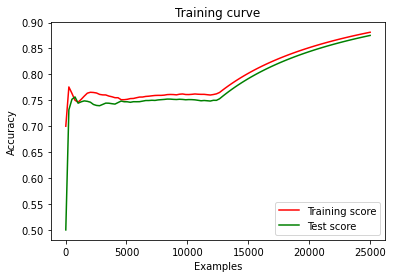

In [450]:
import matplotlib.pyplot as plt
#def plot_learning_curve(x_train, y_test):
    
    
plt.figure()
plt.title("Training curve")
plt.xlabel("Examples")
plt.ylabel("Accuracy")
    
tr_samples= np.linspace(20, x_train.shape[0],100)
    
eval=[]
for sample in tr_samples:
    rep_train = classification_report(y_train[:int(sample)], rf.predict(x_train[:int(sample)]), 0)

    results={
        'sample number': sample,
        'recall': rep_train[0][0],
        'precision': rep_train[0][1],
        'f1-score': rep_train[0][2],
        'general accuracy': rep_train[2][0]
    }
    eval.append(results)
        
        
        
train_recall= [s['recall'] for s in eval]
train_precision= [s['precision'] for s in eval]
train_accuracy = [s['general accuracy'] for s in eval]

train_sample_numbers= [s['sample number'] for s in eval]

plt.plot(train_sample_numbers,train_accuracy , 'r', label= "Training score")    
    
print("\nTraining sample size: ", train_sample_numbers )
    
test_samples= np.linspace(20, x_test.shape[0], 100)
eval2=[]
for sample in test_samples:
    rep_test= classification_report(y_test[:int(sample)], rf.predict(x_test[:int(sample)]), 0)
    
    results2={
        'sample number': sample,
        'recall': rep_test[0][0],
        'precision': rep_test[0][1],
        'f1-score': rep_test[0][2],
        'general accuracy': rep_test[2][0]
    }
    
    eval2.append(results2)


test_recall= [s['recall'] for s in eval2]
test_precision= [s['precision'] for s in eval2]
test_sample_numbers= [s['sample number'] for s in eval2]
test_accuracy = [s['general accuracy'] for s in eval2]
    
plt.plot(test_sample_numbers,test_accuracy , 'g', label= "Test score")    
    
plt.legend(loc="lower right")

    
plt.show()
